### DISNEY_HOTSTAR_EDA

### IMPORTING LIBRARIES

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING DATASET

In [20]:
df = pd.read_csv("hotstar.csv")
df

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie
1,1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie
2,1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie
3,1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie
4,1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie
...,...,...,...,...,...,...,...,...,...,...
6869,1260127438,Will Trent,SHOW ON BREAK- NEXT EPISODE ON 15TH FEB. Speci...,Crime,2023,U/A 16+,NaN,1.0,5.0,tv
6870,1260008508,KBD Juniors - Qualifiers,Match highlights of Kabaddi Junior,Sport,2019,U,NaN,1.0,32.0,tv
6871,12551,Dil Hai Hindustani,Sway to the tunes of the best Hindi/Bollywood ...,Reality,2017,U/A 13+,NaN,2.0,57.0,tv
6872,1260065225,On The Brink,The series reveals the hidden splendours of In...,Animals & Nature,2021,U/A 7+,NaN,2.0,18.0,tv


In [21]:
dataset = df.copy()

### EXPLORING DATASET

In [22]:
print('number of rows and columns: ',df.shape)

number of rows and columns:  (6874, 10)


In [23]:
print("number of elements: ",df.size)

number of elements:  68740


In [24]:
df.columns

Index(['hotstar_id', 'title', 'description', 'genre', 'year', 'age_rating',
       'running_time', 'seasons', 'episodes', 'type'],
      dtype='object')

**DISNEY_HOTSTAR DATASET :** It tells about the performances of different genres in the different platforms of disney hotstar app.

**FEATURES:**
- 'hotstar_id'  : unique identifier for each show or movie on Hotstar
- 'title'       : title or name of the show or movie
- 'description' : brief description or summary of the show or movie
- 'genre'       : category or type of the content 
- 'year'        : year when the show or movie was released
- 'age_rating'  : recommended age group for the audience 
- 'running_time': duration or running time of the show or movie
- 'seasons'     : number of seasons for TV shows
- 'episodes'    : number of episodes for TV shows
- 'type'        : Specifies whether it's a movie or a TV show

### MISSING VALUES AND DUPLICATES

In [11]:
df.isnull().sum()

hotstar_id         0
title              0
description        0
genre              0
year               0
age_rating         0
running_time    2306
seasons         4568
episodes        4568
type               0
dtype: int64

In [12]:
df.duplicated().any()

False

- false means there doesn't exist any duplicate values

we can use heatmap to show null values

<Axes: >

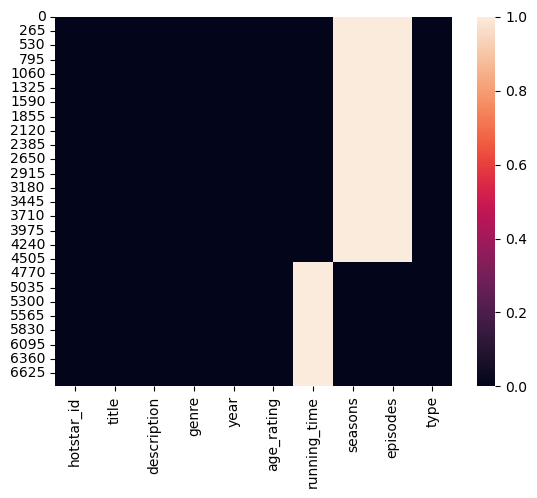

In [13]:
sns.heatmap(df.isnull())

 - white color shows presence of null values

### DROPPING AND FILLING MISSING VALUES

In [25]:
# Fill missing running_time values with 0
df['running_time'].fillna(0, inplace=True)


In [26]:
# Remove rows with missing values

df = df.dropna(subset=['seasons', 'episodes'])


In [28]:
df.sample()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
5193,6808,Punyi Pukur,"Under unforeseen circumstances, Kakon gets mar...",Drama,2015,U/A 13+,0.0,11.0,491.0,tv


In [29]:
df.shape

(2306, 10)

- 6874 rows changed to 2306 rows,that is null values are removed

### DESCRIPTIVE ANALYSIS

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hotstar_id,2306.0,7.371294e+08,6.209864e+08,3.0,12304.25,1.260005e+09,1.260061e+09,1.260130e+09
year,2306.0,2.017659e+03,4.800402e+00,1976.0,2016.00,2.018000e+03,2.021000e+03,2.023000e+03
running_time,2306.0,0.000000e+00,0.000000e+00,0.0,0.00,0.000000e+00,0.000000e+00,0.000000e+00
seasons,2306.0,2.661752e+00,4.942716e+00,1.0,1.00,1.000000e+00,2.000000e+00,7.300000e+01
episodes,2306.0,1.273669e+02,2.581382e+02,1.0,6.00,2.200000e+01,1.307500e+02,3.973000e+03


- now our dataset not have null values

### UNIVARIABLE ANALYSIS

- there is no preference for hotstar_id column,so we can remove it

In [31]:
df.drop(columns="hotstar_id",inplace=True)

In [32]:
df.sample()

,title,description,genre,year,age_rating,running_time,seasons,episodes,type
5202,Seetha Kalyanam,Circumstances force Seetha to don the role of ...,Drama,2018,U/A 13+,0.0,1.0,772.0,tv


- now 'hotstar_id' is removed

###### title

In [33]:
df['title'].value_counts()[:20]

Radha Krishna                  3
Start Music                    3
Hara Hara Mahadeva             3
Amma                           3
Bigg Boss                      3
Connexion                      3
Super Singer Junior            3
Super Singer                   3
SuperCops Vs Super Villains    2
Sri Krishna                    2
Loki                           2
KBD Heroes                     2
Jai Kanhaiya Lal Ki            2
Mahadev                        2
Neeli                          2
Asianet Comedy Awards          2
Kiranmala                      2
Nazar                          2
Ismart Jodi                    2
Mahabharat                     2
Name: title, dtype: int64

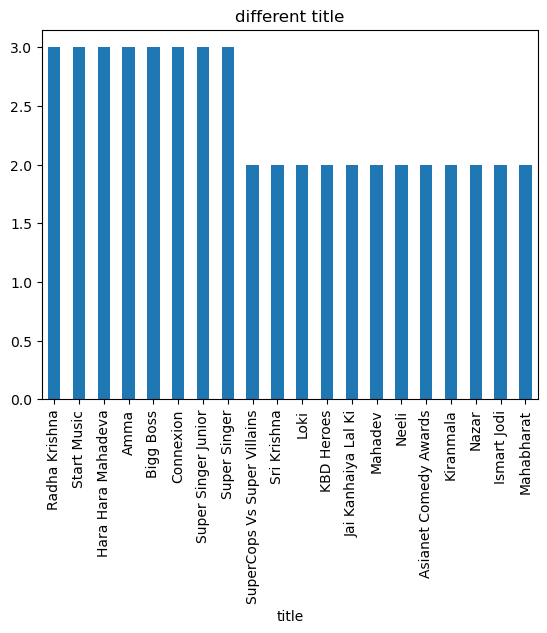

In [34]:
df['title'].value_counts()[:20].plot(kind="bar")
plt.title("different title")
plt.xlabel("title")
plt.show()

- most running programmes : Radha Krishna , Start Music, Hara Hara Mahadeva,Amma,Bigg Boss,Connexion,Super Singer Junior, Super Singer                
                           
                   
                                   
        

###### genre

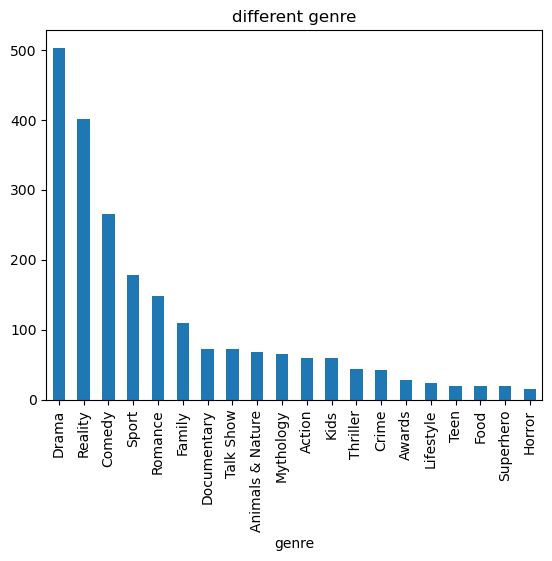

In [35]:
df['genre'].value_counts()[:20].plot(kind="bar")
plt.title("different genre")
plt.xlabel("genre")
plt.show()

- dramas are most viewed category

###### year

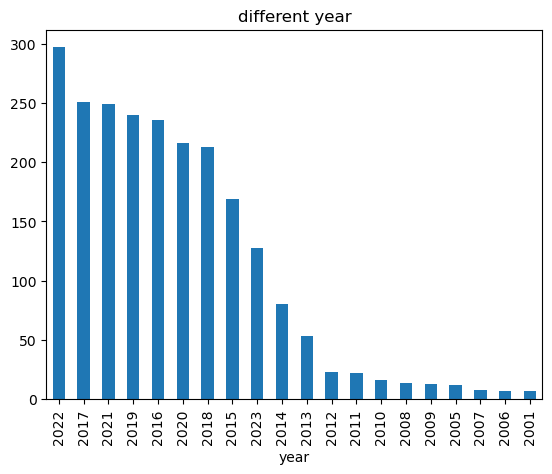

In [36]:
df['year'].value_counts()[:20].plot(kind="bar")
plt.title("different year")
plt.xlabel("year")
plt.show()

- more viewers are in the year 2022

###### age_rating

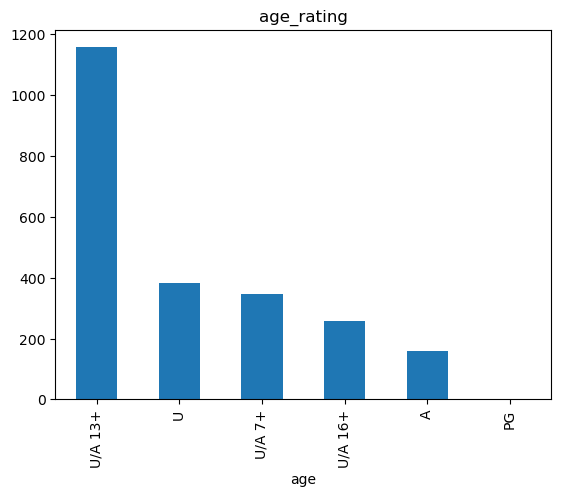

In [37]:
df['age_rating'].value_counts()[:20].plot(kind="bar")
plt.title("age_rating")
plt.xlabel("age")
plt.show()

- age group U/A 13+ are more addicted to shows

###### seasons

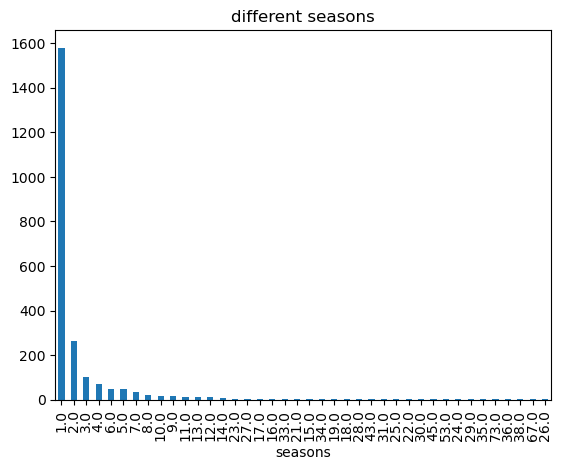

In [38]:
df['seasons'].value_counts().plot(kind="bar")
plt.title("different seasons")
plt.xlabel("seasons")
plt.show()

- more viewers are in the first season

###### Type

In [39]:
df["type"].value_counts()

tv    2306
Name: type, dtype: int64

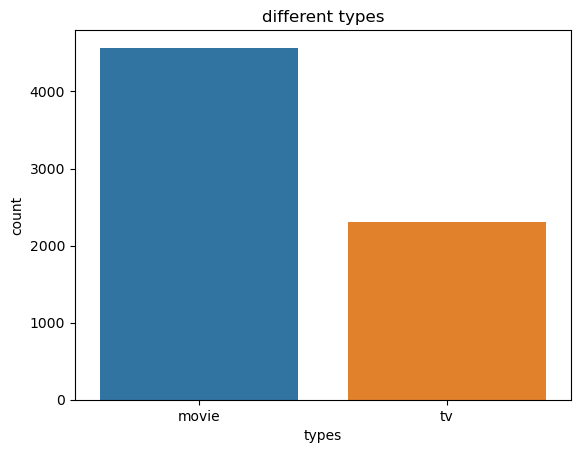

In [40]:
sns.countplot(x="type",data=dataset)
plt.title("different types")
plt.xlabel("types")
plt.show()

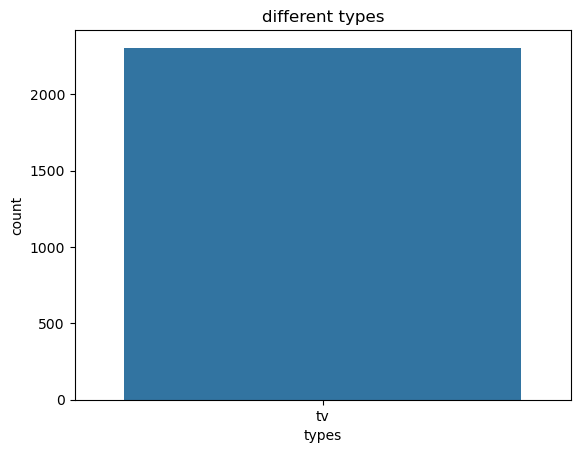

In [41]:
sns.countplot(x="type",data=df)
plt.title("different types")
plt.xlabel("types")
plt.show()

- movies are more without removing missing values,but cleaned dataset have shows in the tv 

### DATA ANALYSIS AND VISUALIZATION

###### Genres and Running Time

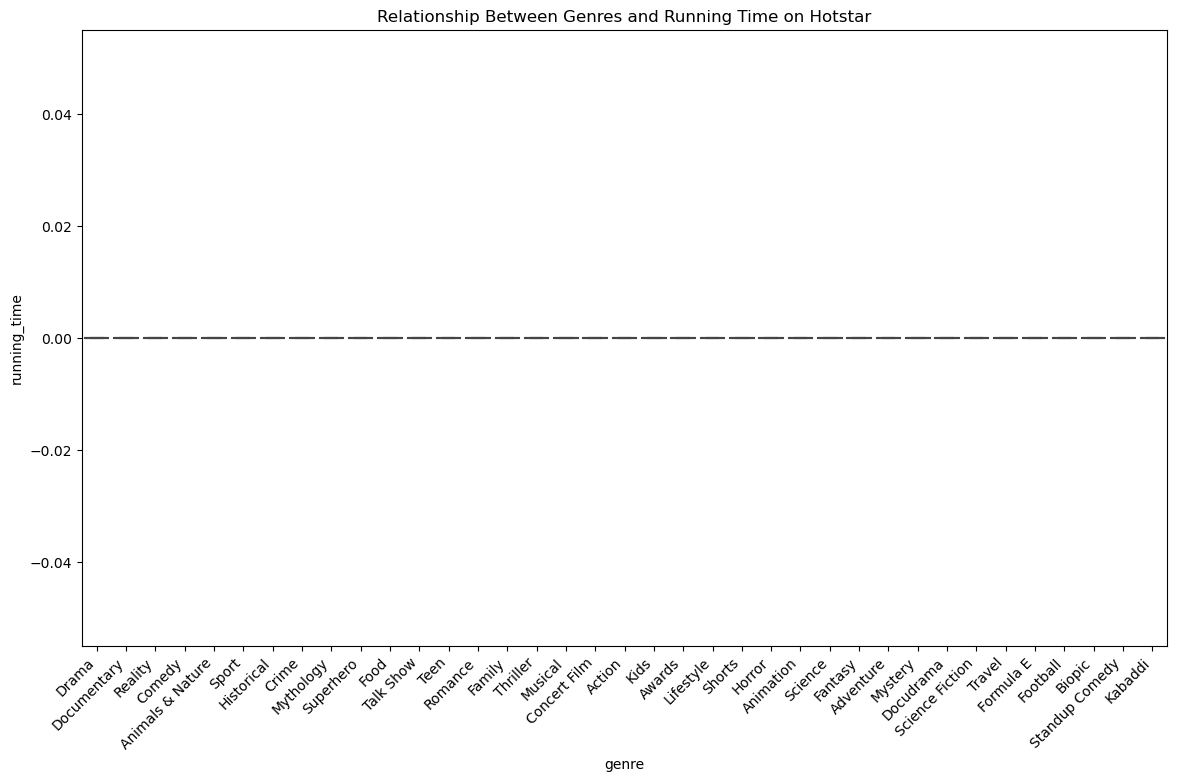

In [42]:
# Box plot to show the relationship between genres and running time
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='running_time', data=df)
plt.title('Relationship Between Genres and Running Time on Hotstar')
plt.xticks(rotation=45, ha='right')
plt.show()


In [43]:
df['running_time'].value_counts()

0.0    2306
Name: running_time, dtype: int64

- all genres have the running time `98.746716`

In [44]:
corr = df.corr()
corr

,year,running_time,seasons,episodes
year,1.000000,NaN,-0.300359,-0.092589
running_time,NaN,NaN,NaN,NaN
seasons,-0.300359,NaN,1.000000,0.665417
episodes,-0.092589,NaN,0.665417,1.000000


<Axes: >

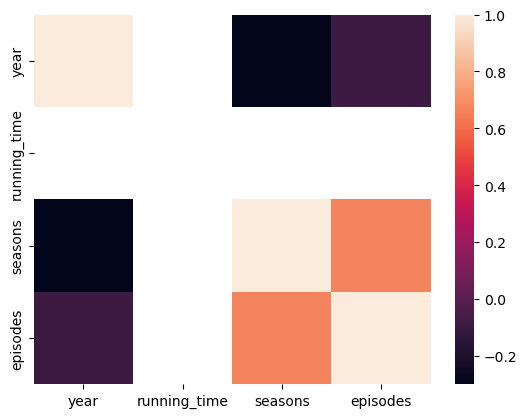

In [45]:
sns.heatmap(corr)



- There is a negative correlation of approximately -0.300359 between 'year' and 'seasons',that is as 'year' increases, the number of 'seasons' tends to decrease.
- A weak negative correlation of approximately -0.092589 between 'year' and 'episodes',that is as the number of 'episodes'  decrease as the 'year' increases.
- A strong positive correlation of approximately 0.665417 between 'seasons' and 'episodes',that is as the number of 'seasons' increases, the number of 'episodes' also tends to increase.

**CONCLUSIONS :**
- most running programmes : Radha Krishna , Start Music, Hara Hara Mahadeva,Amma,Bigg Boss,Connexion,Super Singer Junior, Super Singer  
- dramas are most viewed category
- more viewers are in the year 2022
- age group U/A 13+ are more addicted to shows
- more viewers are in the first season 
- movies are more without removing missing values,but cleaned dataset have shows in the tv 

- all genres have the running time `98.746716`
- There is a negative correlation of approximately -0.300359 between 'year' and 'seasons',that is as 'year' increases, the number of 'seasons' tends to decrease.
- A weak negative correlation of approximately -0.092589 between 'year' and 'episodes',that is as the number of 'episodes'  decrease as the 'year' increases.
- A strong positive correlation of approximately 0.665417 between 'seasons' and 'episodes',that is as the number of 'seasons' increases, the number of 'episodes' also tends to increase.